# Случайные величины
**Случайная величина** (*random variable*) представляет собой переменную, которая в результате испытаний принимает одно из возможных значений, наперед не известное и зависящее от случайных причин, которые заранее не могут быть учтены.

**Дискретная** (*discrete*) случайная величина принимает изолированные значения, в то время как **непрерывная** (*continuous*) случайная величина принимает значения из некоторого непрерывного конечного или бесконечного промежутка.

**Законом распределения дискретной случайной величины** называется соответствие между возможными значениями и из вероятностями.

In [2]:
def normalize(array):
    """ нормализует значения массива, чтобы сумма элементов равнялась 1 """
    return array / array.sum(axis=0)

## Одномерная случайная величина

Сформируем дискретную случайную величину, определив множество возможных значений и вероятности их выпадения в массивах `X` и `p`. Визуализируем **распределение вероятностей** (*Probability Distribution*):

'len(X) = 9, len(p) = 9, sum(p) = 1.0'

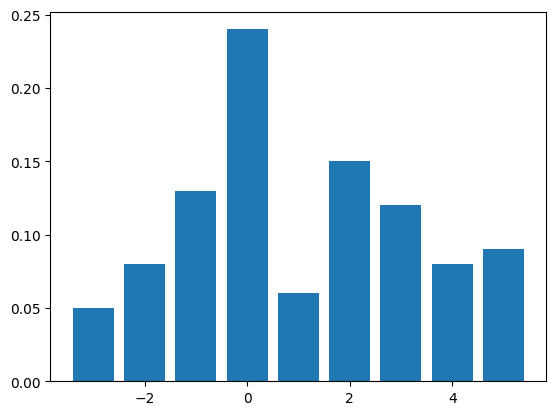

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-3, -2, -1, 0, 1, 2, 3, 4, 5])
p = np.array([0.05, 0.08, 0.13, 0.24, 0.06, 0.15, 0.12, 0.08, 0.09])

plt.bar(X, p)
(f"{len(X) = }, {len(p) = }, {sum(p) = }")

### Функция вероятности **PMF**
Функцию, которая возвращает вероятность того, что дискретная случайная величина $X$ примет определенное значение $n$ называется **функцией вероятности** (*Probability Mass Function* - PMF):

In [38]:
def pmf(n, X, p):
    index = None
    for i in range(len(X)):
        if X[i] == n:
            index = i
            break 
    return 0 if index is None else p[index]

pmf(-1, X, p)

0.13

### Функция распределения

**Функцией распределения** (*Cumulative Distribution Function* - CDF) случайной величины называется функция $F(x)$, определяющая вероятность того, что случайная величина $X$ в результате испытаний примент значение, меньшее $x$. Функция распределения, очевидно, является монотонной неубывающей функцией.

Определим функцию `cdf()`, которая по заданному `x` возвращает значение функции распределения данной случайной величины.

In [7]:
def cdf(x, X, p):
    probability = 0
    for i in range(len(X)):
        if X[i] < x:
            probability += p[i]
    return probability

cdf(5, X, p)

0.56

values = array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8])
cdf_sequence = array([0.  , 0.  , 0.  , 0.05, 0.13, 0.26, 0.5 , 0.56, 0.71, 0.83, 0.91,
       1.  , 1.  , 1.  ])


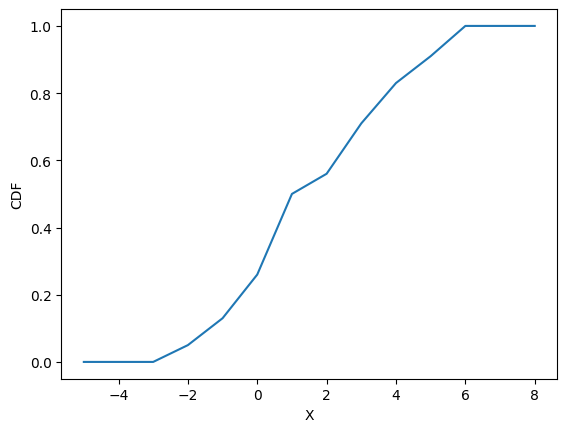

In [16]:
values = np.arange(-5, 9)
cdf_sequence = np.zeros(14)

for i in range(len(values)):
    c = cdf(values[i], X, p)
    cdf_sequence[i] = c

plt.plot(values, cdf_sequence)
plt.xlabel("X")
plt.ylabel("CDF")
print(f"{values = }\n{cdf_sequence = }")

### Плотность вероятности

Когда мы имеем дело с непрерывной случайной величиной, определенной на некотором открытом или закрытом промежуте, то вероятность выпадения конкретного значения является нулевой. Поэтому вместо распределения вероятностей для задания распределения случайной величины используется **плотность вероятности** (*Probability Density Function* - PDF), которая определяет вероятность выпадения значений, лежащих в некотором диапозоне.

Функция распределения $F(x)$ непрерывной случайной величины является непрерывной, кусочно-дифференцируемой функцией. Вероятность $p$ того, что случайная величина примет значение, лежащее на отрезке $[a, b]$, равна приращению функции распределения на этом интервале:
$$
p(a \leq X \leq b) = F(a) - F(b)
$$


Если известна функция распределения F(x), плотность вероятности может быть получена как производная от функции распределения.

Предположим, что функция распределения задана сигмоидой c $\alpha = 0.1$:

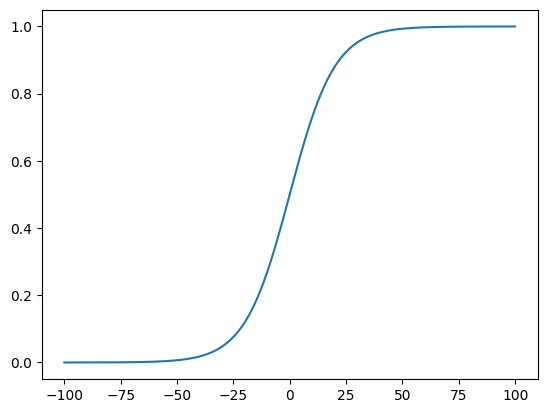

In [13]:
def sigmoid(x, alpha=0.1):
    return 1 / (1 + np.exp(-alpha * x))

segment = np.linspace(-100, 100, 1000)
cdf_sequence = np.zeros_like(segment)

for i in range(len(segment)):
    cdf_sequence[i] = sigmoid(segment[i])

plt.plot(segment, cdf_sequence)

Напишем функцию `deriv_sigmoid`, которая возвращает значение производной сигмоиды в точе `x`. Тогда мы сможем получить значения плотности вероятности на рассматриваемом отрезке `segment`:

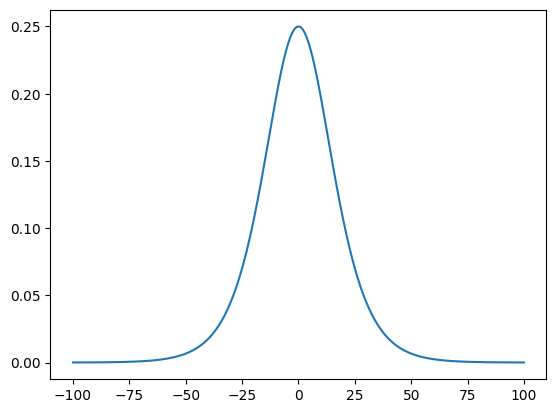

In [14]:
def deriv_sigmoid(x, alpha=0.1):
    return sigmoid(x, alpha) * (1 - sigmoid(x, alpha))

pdf = np.zeros_like(segment)
for i in range(len(segment)):
    pdf[i] = deriv_sigmoid(segment[i])

plt.plot(segment, pdf)

Для того, чтобы по плотности вероятности $f(x)$ вычислить вероятность того, что случайная величина примет значение, лежащее на отрезке $[a, b]$, нужно проинтегрировать плотность вероятности в прделах от $a$ до $b$:
$$
p(a \leq X \leq b) = \int_a^b f(x) dx
$$
Так как функция распределения $F(x)$ является первообразной плотности вероятности, то
$$
\int_a^b f(x) dx = F(b) - F(a)
$$
Что соответствует описанной выше формуле для функции вероятности.

### Математическое ожидание

**Математическое ожидание** (*expected value*) – это среднее значение случайной величины, которое показывает, какой результат в среднем можно ожидать от повторения эксперимента много раз.

$$ \mathrm E[X]=\sum_{i=1}^n x_1p_1$$
для непрерывного распределения
$$ \mathrm E[X] = \int\limits_{-\infty}^\infty xf(x)$$
где $f(x)$ - функция плотности распределения

In [ ]:
def EV(X, p):
    """Математическое ожидание"""
    return sum(X*p)
EV(X, p)

4.11

Если распределение вероятностей случайной величины неизвестно, математическое ожидание можно получить из результатов большого количества испытаний как среднее значение всех исходов (*sample mean*):
$$ \overline x = \frac{1}{n} \sum_{i=1}^n x_i $$

In [ ]:
# сгенерируем множество исходов заданной случайной величины
samples = np.random.choice(X, size=1000000, p=p)
samples.mean()

4.111806

### Отклонение случайной величины
**Отклонение** (*deviation*) случайной величины представляет собой рзность случайной величины и его математического ожидания:
$$ X - \mathrm E[X] $$
Вероятность отклонения $ x_i - \mathrm E[X]$ равно вероятности $p_i$ значения $x_i$.

Математическое ожидание отклонения равно нулю, так как отклонения в положительную сторону компенсируются отклонениями в отрицательную сторону (их значения отрицательны).

In [ ]:
deviations = X-EV(X, p)
print(deviations)
EV(deviations, p)   # Математическое ожидание отклонения равно нулю

[-4.11 -3.11 -2.11 -1.11 -0.11  0.89  1.89  2.89  3.89]


-4.440892098500626e-16

### Дисперсия
**Дисперсией** (*Variance*) дискретной случайной величины называется математическое ожидание *квадрата* отклонения случайной величины от ее математического ожидания:
$$ \mathrm{Var}(X) = \mathrm E[(X - \mathrm E[X])^2] = \sum {(x_i - \mathrm E[X])^2p_i} $$

In [ ]:
from statistics import variance
from numpy import power

def var(X, p):
    ev = EV(X, p)
    variance = 0
    for i in range(len(X)):
        variance += ((X[i] - ev) ** 2) * p[i]
    return variance

var(X, p)

4.9979000000000005

### Выборочная дисперсия

**Выборочная дисперсия** (*Sample Variance*) - дисперсия, оцениваемая эмпирически на основе данных выборки
$$ \tilde S_X^2 = \frac{1}{n} \sum_{i=1}^n (x_i - \overline x)^2 $$

**Несмещённая** (*unbiased*) выборочная дисперсия:
$$ S_X^2 = \frac{1}{n-1} \sum_{i=1}^n (x_i - \overline x)^2 $$
Деление на $n-1$ вместо $n$ дает чуть более высокую оценку $ S_X^2 = \frac{n}{n-1} \tilde S_X^2$. При больших $n$ несмещенная дисперсия дает лучшую оценку, чем смещенная.

In [ ]:
def var(samples):
    ev = samples.mean()
    variance = 0
    for s in samples:
        variance += (s - ev) ** 2

    return variance / len(samples)

var(samples)

4.993393418377746

In [ ]:
np.var(samples)     # два вариана вычисления
samples.var()       # дисперсии с numpy

4.993393418363999

### Стандартное отклонение
**Стандартное отклонение** (*standard deviation*) или **среднеквадратическое отклонение**  – это мера того, насколько значения случайной величины разбросаны относительно её среднего значения. Стандартное отклонение вычисляется как квадратный корень от дисперсии:
$$
\sigma_X = \sqrt{\mathrm{Var}(X)}
$$

In [ ]:
np.std(samples)     # два вариана вычисления
samples.std()       # среднеквадратического отклонения c numpy

2.2345902126260193

### Мода, Медиана
**Модой** (*Mode*) случайной величины называется ее наиболее вероятное значение.

**Медианой** (*Median*)случайной величины называется такое значение, для которого вероятность получить большее значение равно вероятности получить меньшее значение ($0.5$). Если случайная величина является непрерывной, то медиана может быть представлена уравнением:
$$
\int_{- \infty}^m f(x)dx = 0.5
$$
Где $f(x)$ – *плотность вероятности распределения* случайной величнины (*probabity density function* - PDF)
